# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [1]:
#!pip3 install eikon
#!pip3 install cufflinks
#!pip3 install seaborn
!pip3 install numpy

# Importar librerías

In [2]:
import eikon as ek  # the Eikon Python wrapper package
import numpy as np  # NumPy
import pandas as pd  # pandas
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline

In [2]:
# Se inicia la conexión a refinitiv mediante eikon 

In [4]:
cfg = cp.ConfigParser()
cfg.read('../refinitiv.cfg')
ek.set_app_key(cfg['eikon']['app_id'])

### Numpy

In [6]:
# Python program to demonstrate
# basic array characteristics
import numpy as np
 
# Creating array object
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]] )
 
# Printing type of arr object
print("Array is of type: ", type(arr))
 
# Printing array dimensions (axes)
print("No. of dimensions: ", arr.ndim)
 
# Printing shape of array
print("Shape of array: ", arr.shape)
 
# Printing size (total number of elements) of array
print("Size of array: ", arr.size)
 
# Printing type of elements in array
print("Array stores elements of type: ", arr.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  2
Shape of array:  (2, 3)
Size of array:  6
Array stores elements of type:  int64


## Python Pandas

In [10]:
import pandas as pd 

data = {
  "sesion": [420, 380, 390],
  "asistencia": [25, 20, 27]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

df

,sesion,asistencia
0,420,25
1,380,20
2,390,27


In [12]:
#utilización de índice:
print(df.loc[1])

sesion        380
asistencia     20
Name: 1, dtype: int64


In [13]:
df = pd.DataFrame(data, index = ["dia1", "dia2", "dia3"])

df 

,sesion,asistencia
dia1,420,25
dia2,380,20
dia3,390,27


In [14]:
df

,sesion,asistencia
dia1,420,25
dia2,380,20
dia3,390,27


# Refinitiv Python

# Extracción de datos estructurados

Las funciones básicas para extraer datos de eikon son las siguiente:
- get_symbology
- get_data
- get_timeseries

get_symbology(symbol, from_symbol_type='RIC', to_symbol_type=None, raw_output=False, debug=False, bestMatch=True)
Devuelve una lista de nombre de instrumentos convertiods en el código del intrumento.

get_data(instruments, fields, parameters=None, field_name=False, raw_output=False, debug=False)
Devuelve un dataframe de pandas con campos en columnas e intrumentos como índice de renglones.

get_timeseries(rics, fields='*', start_date=None, end_date=None, interval='daily', count=None, calendar=None, corax=None, normalize=False, raw_output=False, debug=False)
Devuelve series históricas de uno o varios RICs.
<br>
Referencia: https://docs-developers.refinitiv.com/1594387995587/14684/book/en/eikon/index.html
RICs Reuters instrument code

# Obtener datos

In [25]:
hh = 1, 2

In [27]:
hh[0]

1

In [32]:
help(ek)

Help on package eikon:

NAME
    eikon - # coding: utf-8

PACKAGE CONTENTS
    Profile
    data_grid
    eikonError
    json_requests
    news_request
    streaming_session (package)
    symbology
    time_series
    tools
    vendor (package)

SUBMODULES
    cache
    desktop_session
    istream_callback
    itemstream
    session
    stream
    stream_connection
    streamingprice
    streamingprice_callback
    streamingprices

VERSION
    1.1.16

FILE
    /opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/eikon/__init__.py




In [30]:
data = ek.get_data(["SPOT.K", "IBM", "GOOG.O", "MSFT.O"], ["TR.PriceClose", "TR.Volume", "TR.PriceLow", "TR.TotalReturnYTD"])[0]

In [31]:
data

,Instrument,Price Close,Volume,Price Low,YTD Total Return
0,SPOT.K,254.99,1728708,250.23,36.288649
1,IBM,184.13,4618785,184.06,14.577955
2,GOOG.O,138.75,33358019,138.74,3.093734
3,MSFT.O,407.54,15935197,407.36,9.321231


In [12]:
type(data)

pandas.core.frame.DataFrame

In [13]:
data.index

RangeIndex(start=0, stop=4, step=1)

# Obtener datos de un índice

In [33]:
dax = ek.get_data('0#.GDAXI', fields=['TR.CommonName', 'TR.PriceClose',
                                      'TR.Volume', 'TR.TotalReturnYTD'])[0]

In [34]:
dax

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,46.33,2282454,-5.02255
1,IFXGn.DE,Infineon Technologies AG,33.225,3182174,-11.177249
2,SIEGn.DE,Siemens AG,174.9,1043062,5.853548
3,EONGn.DE,E ON SE,11.74,3805719,-3.374486
4,DBKGn.DE,Deutsche Bank AG,12.302,4469550,-0.501456
5,SATG_p.DE,Sartorius AG,337.2,40578,1.20048
6,SAPG.DE,Sap Se,173.0,1969921,24.032119
7,BAYGn.DE,Bayer AG,28.585,2182694,-15.001487
8,RWEG.DE,RWE AG,30.36,2434906,-26.274891
9,1COV.DE,Covestro AG,50.08,379112,-4.935459


In [35]:
dax[0:5]

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,46.33,2282454,-5.02255
1,IFXGn.DE,Infineon Technologies AG,33.225,3182174,-11.177249
2,SIEGn.DE,Siemens AG,174.9,1043062,5.853548
3,EONGn.DE,E ON SE,11.74,3805719,-3.374486
4,DBKGn.DE,Deutsche Bank AG,12.302,4469550,-0.501456


In [38]:
ivv

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,IVV,MSFT.OQ,MICROSOFT CORP ORD,7.2476,76262210.0,2279218.0
1,IVV,AAPL.OQ,APPLE INC ORD,6.6122,150011064.0,4483445.0
2,IVV,NVDA.OQ,NVIDIA CORP ORD,3.7274,25344509.0,757684.0
3,IVV,AMZN.OQ,AMAZON.COM INC ORD,3.4617,93312685.0,2788765.0
4,IVV,META.OQ,META PLATFORMS INC ORD,2.1239,22775278.0,680485.0
...,...,...,...,...,...,...
505,IVV,ESH24,EMINI S&P MAR4,0.0088,3644.0,-746.0
506,IVV,NWS.OQ,NEWS CORP ORD,0.0072,1176343.0,33660.0
507,IVV,,OTHER FEES,0.0,4.0,0.0
508,IVV,,TOPSIDE ADJUSTMENT,0.0,1.0,0.0


In [39]:
dax.set_index('Instrument')['YTD Total Return']

Instrument
BASFn.DE      -5.02255
IFXGn.DE    -11.177249
SIEGn.DE      5.853548
EONGn.DE     -3.374486
DBKGn.DE     -0.501456
SATG_p.DE      1.20048
SAPG.DE      24.032119
BAYGn.DE    -15.001487
RWEG.DE     -26.274891
1COV.DE      -4.935459
HNKG_p.DE    -3.870436
ZALG.DE     -10.862471
DTEGn.DE       1.37931
MRCG.DE       8.431645
PSHG_p.DE     5.613126
VOWG_p.DE    10.035778
BMWG.DE       6.648144
BEIG.DE       3.868828
HEIG.DE       6.399802
RHMG.DE      46.968641
MTXGn.DE     10.268886
FREG.DE      -7.552547
DHLn.DE        -4.3139
ALVG.DE       1.529242
MUVGn.DE     12.370035
CONG.DE      -4.472179
SHLG.DE       5.589354
SY1G.DE      -1.746287
ADSGn.DE      2.193745
HNRGn.DE      9.061489
DTGGe.DE      8.495003
ENR1n.DE         15.75
MBGn.DE      14.084732
BNRGn.DE     -0.192261
CBKG.DE      -0.139405
AIRG.DE       5.225585
VNAn.DE      -8.794674
DB1Gn.DE      3.243968
QIA.DE        1.683225
P911_p.DE     3.254068
Name: YTD Total Return, dtype: Float64

In [40]:
dax.set_index('Instrument')['YTD Total Return'].sort_values().iplot(kind='bar', color='blue')

In [43]:
ivv = ek.get_data('IVV', ['TR.FundHoldingRIC','TR.FundHoldingName',
                           'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares',
                           'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})[0]
ivv

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,IVV,MSFT.OQ,MICROSOFT CORP ORD,7.2476,76262210.0,2279218.0
1,IVV,AAPL.OQ,APPLE INC ORD,6.6122,150011064.0,4483445.0
2,IVV,NVDA.OQ,NVIDIA CORP ORD,3.7274,25344509.0,757684.0
3,IVV,AMZN.OQ,AMAZON.COM INC ORD,3.4617,93312685.0,2788765.0
4,IVV,META.OQ,META PLATFORMS INC ORD,2.1239,22775278.0,680485.0
...,...,...,...,...,...,...
505,IVV,ESH24,EMINI S&P MAR4,0.0088,3644.0,-746.0
506,IVV,NWS.OQ,NEWS CORP ORD,0.0072,1176343.0,33660.0
507,IVV,,OTHER FEES,0.0,4.0,0.0
508,IVV,,TOPSIDE ADJUSTMENT,0.0,1.0,0.0


filtren los instrumentos cuya inversión sea mayor a 1%
Generen el gráfico con los rendimientos de dichos intrumentos

In [44]:
# Filter rows where column 'A' is greater than 3
filtered_df = ivv[ivv['Percentage of Fund Assets'] > 1]
filtered_df

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,IVV,MSFT.OQ,MICROSOFT CORP ORD,7.2476,76262210.0,2279218.0
1,IVV,AAPL.OQ,APPLE INC ORD,6.6122,150011064.0,4483445.0
2,IVV,NVDA.OQ,NVIDIA CORP ORD,3.7274,25344509.0,757684.0
3,IVV,AMZN.OQ,AMAZON.COM INC ORD,3.4617,93312685.0,2788765.0
4,IVV,META.OQ,META PLATFORMS INC ORD,2.1239,22775278.0,680485.0
5,IVV,GOOGL.OQ,ALPHABET INC CLASS A ORD,2.0336,60724479.0,1815255.0
6,IVV,GOOG.OQ,ALPHABET INC CLASS C ORD,1.7323,51107368.0,1527677.0
7,IVV,BRKb.N,BERKSHIRE HATHAWAY INC ORD,1.7125,18669249.0,557855.0
8,IVV,TSLA.OQ,TESLA INC ORD,1.2705,28378290.0,848250.0
9,IVV,AVGO.OQ,BROADCOM INC ORD,1.2704,4503915.0,134531.0


In [46]:
filtered_df.set_index('Holding RIC')['Percentage of Fund Assets'].sort_values().iplot(kind='bar', color='blue')

In [47]:
lp4 = ek.get_data('LP40065886', ['TR.FundHoldingRIC','TR.FundHoldingName',
                           'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares',
                           'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})[0]

In [48]:
lp4

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,LP40065886,MSFT.OQ,MICROSOFT CORP ORD,6.2948,5010898.0,29309.0
1,LP40065886,AAPL.OQ,APPLE INC ORD,5.8043,9962101.0,58523.0
2,LP40065886,NVDA.OQ,NVIDIA CORP ORD,3.0757,1582120.0,9323.0
3,LP40065886,AMZN.OQ,AMAZON.COM INC ORD,3.0752,6271046.0,36710.0
4,LP40065886,META.OQ,META PLATFORMS INC ORD,1.8449,1496643.0,8861.0
...,...,...,...,...,...,...
3368,LP40065886,,NEXT BRIDGE HYDROCARBONS INC,0.0,49663.0,0.0
3369,LP40065886,,CARISMA THERAPEUTICS INC CVR,0.0,143290.0,0.0
3370,LP40065886,,GCI LIBERTY INC ESCROW SHARES,0.0,82371.0,0.0
3371,LP40065886,,SPECTRUM PHARMACEUTICALS INC CVR,0.0,109299.0,0.0


In [49]:
dax.set_index('Instrument')['YTD Total Return'].sort_values().iplot(kind='bar', color='blue')

In [28]:
f = [[1, 2], [2, 3]]

In [29]:
print(f)

[[1, 2], [2, 3]]


In [50]:
XLE= ek.get_data('XLE', ['TR.FundHoldingRIC','TR.FundHoldingName', 'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares', 'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})[0]

In [51]:
XLE

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,XLE,XOM.N,EXXON MOBIL CORP ORD,23.1747,81790606.0,747838.0
1,XLE,CVX.N,CHEVRON CORP ORD,17.4105,42849825.0,391790.0
2,XLE,COP.N,CONOCOPHILLIPS ORD,8.9353,28981520.0,264942.0
3,XLE,EOG.N,EOG RESOURCES INC ORD,4.4636,14233161.0,130068.0
4,XLE,SLB.N,SCHLUMBERGER NV ORD,4.3814,32644460.0,298466.0
5,XLE,PSX.N,PHILLIPS 66 ORD,4.3028,10818827.0,98965.0
6,XLE,MPC.N,MARATHON PETROLEUM CORP ORD,4.2613,9337025.0,85360.0
7,XLE,PXD.N,PIONEER NATURAL RESOURCES CO ORD,3.634,5737253.0,52504.0
8,XLE,VLO.N,VALERO ENERGY CORP ORD,3.2048,8371980.0,76611.0
9,XLE,WMB.N,WILLIAMS COMPANIES INC ORD,2.8575,29914459.0,273551.0


In [32]:
XLE.set_index('Holding RIC')['Number of Shares']

Holding RIC
XOM.N          81790606.0
CVX.N          42849825.0
COP.N          28981520.0
EOG.N          14233161.0
SLB.N          32644460.0
PSX.N          10818827.0
MPC.N           9337025.0
PXD.N           5737253.0
VLO.N           8371980.0
WMB.N          29914459.0
OKE.N          14325268.0
HES.N           6797872.0
OXY.N          16236699.0
KMI.N          47553722.0
HAL.N          22009918.0
BKR.OQ         24743956.0
FANG.OQ         4401392.0
DVN.N          15755239.0
TRGP.N          5483164.0
CTRA.N         18496916.0
EQT.N          10114969.0
MRO.N          14391582.0
APA.OQ          7542373.0
XAEH24           139200.0
LP40098642    90164858.93
               5874190.96
                     <NA>
Name: Number of Shares, dtype: Float64

In [33]:
XLE[(XLE['Holding RIC'] != '')].set_index('Holding RIC')['Number of Shares'].sort_values().iplot(kind='bar', color='blue')

In [52]:
help(ek.get_data)

Help on function get_data in module eikon.data_grid:

get_data(instruments, fields, parameters=None, field_name=False, raw_output=False, debug=False)
    Returns a pandas.DataFrame with fields in columns and instruments as row index
    
    Parameters
    ----------
    instruments: string or list
        Single instrument or list of instruments to request.
    
    fields: string, dictionary or list of strings and/or dictionaries.
        List of fields to request.
    
        Examples:
    
        - 'TR.PriceClose'
        - {'TR.GrossProfit': { 'params':{ 'Scale': 6, 'Curn': 'EUR' }}
        - {'TR.GrossProfit': { 'params':{ 'Scale': 6, 'Curn': 'EUR' },sort_dir:'desc'}
        - ['TR.PriceClose','TR.PriceOpen']
        - [{'TR.PriceClose':  {'sort_dir':asc,sort_priority:1}},{'TR.PriceOpen':  {'sort_dir':asc,sort_priority:0}}
        
        You can use the function TR_Field to build the fields:
    
        >>> fields = [ek.TR_Field('tr.revenue'),ek.TR_Field('tr.open','asc',1),e

# Descargar series de tiempo

In [35]:
#help(ek.get_timeseries)

In [61]:
import datetime as dt
today = dt.datetime.today()
d = today - dt.timedelta(days=102)
print(today, d)

2024-02-26 17:36:49.740721 2023-11-16 17:36:49.740721


In [62]:
df_ts = ek.get_timeseries(["GOOG.O"], 
                          start_date = d, 
                          end_date = today, 
                          interval="daily", 
                          corax = 'adjusted' )
df_ts

GOOG.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2023-11-17,138.0,136.94,135.48,137.82,276269,25590191
2023-11-20,138.425,137.92,135.49,135.5,212277,19589006
2023-11-21,138.965,138.62,137.705,137.94,180103,17648067
2023-11-22,141.1,140.02,139.0,139.1,189637,17310209
2023-11-24,139.677,138.22,137.47,139.54,98747,8828640
...,...,...,...,...,...,...
2024-02-20,143.3285,142.2,140.8,140.94,235771,18625589
2024-02-21,143.98,143.84,141.91,142.64,220920,16499584
2024-02-22,146.2,145.32,144.01,146.12,249677,23024707


In [63]:
import datetime as dt
today = dt.datetime.today()
d = today - dt.timedelta(days=100)
print(today, d)

2024-02-26 17:38:06.787338 2023-11-18 17:38:06.787338


In [64]:
df_ts = ek.get_timeseries(["000001.SZ"], start_date = "2016-06-14", end_date = "2016-06-20", interval="daily", corax = 'unadjusted')
df_ts

000001.SZ,HIGH,CLOSE,LOW,OPEN,VOLUME
Date,,,,,
2016-06-14,10.41,10.4,10.32,10.34,27363726
2016-06-15,10.48,10.44,10.32,10.33,37817241
2016-06-16,8.6,8.57,8.53,8.57,38667008
2016-06-17,8.61,8.58,8.54,8.57,31517300
2016-06-20,8.6,8.6,8.56,8.59,27073158


In [65]:
df_ts = ek.get_timeseries(["MSFT.O"], start_date = d, end_date = today, interval="daily", corax = 'unadjusted')
df_ts

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2023-11-20,378.87,377.44,371.0,371.22,771744,52528964
2023-11-21,376.2215,373.07,371.12,375.67,460035,28423145
2023-11-22,379.7899,377.85,374.965,378.0,405033,23361184
2023-11-24,377.97,377.43,375.135,377.33,201903,10176649
2023-11-27,380.64,378.61,376.2,376.78,352779,22179228
...,...,...,...,...,...,...
2024-02-20,404.49,402.79,398.01,403.24,450376,24307915
2024-02-21,402.29,402.18,397.22,400.17,372892,18631072
2024-02-22,412.83,411.65,408.57,410.19,438853,27009869


In [66]:
type(df_ts)

pandas.core.frame.DataFrame

In [67]:
df_ts.dtypes

MSFT.O
HIGH      Float64
CLOSE     Float64
LOW       Float64
OPEN      Float64
COUNT       Int64
VOLUME      Int64
dtype: object

In [68]:
#df_ts.values

In [69]:
df_ts['CLOSE']

Date
2023-11-20    377.44
2023-11-21    373.07
2023-11-22    377.85
2023-11-24    377.43
2023-11-27    378.61
               ...  
2024-02-20    402.79
2024-02-21    402.18
2024-02-22    411.65
2024-02-23    410.34
2024-02-26    407.54
Name: CLOSE, Length: 66, dtype: Float64

In [45]:
#podemos usar la seleccion boleeana dentro del pandas.DataFrame
df_ts[(df_ts['HIGH'] > 250)]

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2023-11-13,368.47,366.68,365.9,368.22,340608,19986506
2023-11-14,371.95,370.27,367.3454,371.01,409291,27683862
2023-11-15,373.13,369.67,367.11,371.28,399874,26860095
2023-11-16,376.35,376.17,370.18,370.96,405563,27182315
2023-11-17,374.37,369.85,367.0,373.61,560742,40325371
...,...,...,...,...,...,...
2024-02-12,420.74,415.26,414.75,420.555,401543,21202921
2024-02-13,410.071,406.32,403.39,404.94,544613,27824936
2024-02-14,409.84,409.49,404.57,408.07,384410,20401190


In [46]:
df_ts.index

DatetimeIndex(['2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16',
               '2023-11-17', '2023-11-20', '2023-11-21', '2023-11-22',
               '2023-11-24', '2023-11-27', '2023-11-28', '2023-11-29',
               '2023-11-30', '2023-12-01', '2023-12-04', '2023-12-05',
               '2023-12-06', '2023-12-07', '2023-12-08', '2023-12-11',
               '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-15',
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19', '2024-01-22', '2024-01-23',
               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-29',
               '2024-01-30', '2024-01-31', '2024-02-01', '2024-02-02',
      

In [47]:
today_date = dt.date.today()
d = today_date - dt.timedelta(days=12)
print(d)

2024-02-07


In [48]:
#Podemos seleccionar una sola fila, como lo haciamos en numpy, de la siguiente manera:
df_ts.iloc[1:4]

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2023-11-14,371.95,370.27,367.3454,371.01,409291,27683862
2023-11-15,373.13,369.67,367.11,371.28,399874,26860095
2023-11-16,376.35,376.17,370.18,370.96,405563,27182315


In [49]:
#El atributo pandas.DateFrame.loc nos permite indexar las filas en vez de las columnas
df_ts.loc[[d]]

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2024-02-07,414.3,414.05,407.4,407.44,352956,22340526


In [50]:
df_ts[-10:]

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2024-02-05,411.16,405.65,403.99,409.9,455599,25352286
2024-02-06,407.97,405.49,402.91,405.88,342464,18382624
2024-02-07,414.3,414.05,407.4,407.44,352956,22340526
2024-02-08,415.56,414.11,412.53,414.05,323852,21225257
2024-02-09,420.82,420.55,415.09,415.25,369747,22032844
2024-02-12,420.74,415.26,414.75,420.555,401543,21202921
2024-02-13,410.071,406.32,403.39,404.94,544613,27824936
2024-02-14,409.84,409.49,404.57,408.07,384410,20401190
2024-02-15,409.13,406.56,404.29,408.14,412617,21825525


# Estadística básica

In [76]:
ivv

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,IVV,MSFT.OQ,MICROSOFT CORP ORD,7.2476,76262210.0,2279218.0
1,IVV,AAPL.OQ,APPLE INC ORD,6.6122,150011064.0,4483445.0
2,IVV,NVDA.OQ,NVIDIA CORP ORD,3.7274,25344509.0,757684.0
3,IVV,AMZN.OQ,AMAZON.COM INC ORD,3.4617,93312685.0,2788765.0
4,IVV,META.OQ,META PLATFORMS INC ORD,2.1239,22775278.0,680485.0
...,...,...,...,...,...,...
505,IVV,ESH24,EMINI S&P MAR4,0.0088,3644.0,-746.0
506,IVV,NWS.OQ,NEWS CORP ORD,0.0072,1176343.0,33660.0
507,IVV,,OTHER FEES,0.0,4.0,0.0
508,IVV,,TOPSIDE ADJUSTMENT,0.0,1.0,0.0


In [77]:
ivv_corto = ivv['Holding RIC'][0:10].tolist()
ivv_corto

['MSFT.OQ',
 'AAPL.OQ',
 'NVDA.OQ',
 'AMZN.OQ',
 'META.OQ',
 'GOOGL.OQ',
 'GOOG.OQ',
 'BRKb.N',
 'TSLA.OQ',
 'AVGO.OQ']

In [71]:
today = dt.datetime.today()
d = today - dt.timedelta(days=100)
print(today, d)

2024-02-26 17:39:08.841121 2023-11-18 17:39:08.841121


In [78]:
df = ek.get_timeseries(ivv_corto, start_date = d, end_date = today, fields='CLOSE', interval="daily")
df

CLOSE,MSFT.OQ,AAPL.OQ,NVDA.OQ,AMZN.OQ,META.OQ,GOOGL.OQ,GOOG.OQ,BRKb.N,TSLA.OQ,AVGO.OQ
Date,,,,,,,,,,
2023-11-20,377.44,191.45,504.09,146.13,339.97,136.25,137.92,361.33,235.6,995.71
2023-11-21,373.07,190.64,499.44,143.9,336.98,136.97,138.62,361.0,241.2,981.2
2023-11-22,377.85,191.31,487.16,146.71,341.49,138.49,140.02,361.8,234.21,972.0
2023-11-24,377.43,189.97,477.76,146.74,338.23,136.69,138.22,362.68,235.45,978.87
2023-11-27,378.61,189.79,482.42,147.73,334.7,136.41,138.05,361.34,236.08,950.24
...,...,...,...,...,...,...,...,...,...,...
2024-02-20,402.79,181.56,694.52,167.08,471.75,141.12,142.2,407.15,193.76,1226.55
2024-02-21,402.18,182.32,674.72,168.59,468.03,142.55,143.84,409.25,194.77,1227.45
2024-02-22,411.65,184.37,785.38,174.58,486.13,144.09,145.32,415.16,197.41,1304.9


In [79]:
df.describe()

CLOSE,MSFT.OQ,AAPL.OQ,NVDA.OQ,AMZN.OQ,META.OQ,GOOGL.OQ,GOOG.OQ,BRKb.N,TSLA.OQ,AVGO.OQ
count,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0,66.0
mean,387.968333,189.423788,567.606667,155.903939,382.784091,140.373712,141.786515,372.939697,221.927121,1123.649091
std,16.361964,4.738616,101.033517,9.597067,54.904514,5.649534,5.661218,18.639667,25.407271,117.199601
min,365.93,181.16,455.03,143.9,317.45,129.27,130.63,352.38,181.06,903.64
25%,374.11,185.5675,481.865,147.435,339.235,136.47,138.0625,358.84,194.0125,1051.605
50%,380.805,189.61,526.965,153.46,358.49,140.47,141.8,363.48,234.585,1124.29
75%,404.0275,193.36,629.6375,160.765,400.78,143.89,145.215,386.9725,241.0125,1225.8175
max,420.55,198.11,790.92,174.99,486.13,153.51,154.84,417.22,261.44,1309.13


In [81]:
correlacion = df[ivv_corto].corr()
print(correlacion)

CLOSE      MSFT.OQ   AAPL.OQ   NVDA.OQ   AMZN.OQ   META.OQ  GOOGL.OQ   
CLOSE                                                                  
MSFT.OQ   1.000000 -0.407309  0.934637  0.893371  0.901274  0.786455  \
AAPL.OQ  -0.407309  1.000000 -0.528410 -0.435077 -0.545918 -0.214425   
NVDA.OQ   0.934637 -0.528410  1.000000  0.957440  0.974326  0.663464   
AMZN.OQ   0.893371 -0.435077  0.957440  1.000000  0.978047  0.640305   
META.OQ   0.901274 -0.545918  0.974326  0.978047  1.000000  0.632121   
GOOGL.OQ  0.786455 -0.214425  0.663464  0.640305  0.632121  1.000000   
GOOG.OQ   0.777860 -0.212372  0.651394  0.622690  0.616447  0.999450   
BRKb.N    0.876675 -0.577506  0.958413  0.923061  0.956771  0.571919   
TSLA.OQ  -0.937988  0.475609 -0.880439 -0.796521 -0.835189 -0.710986   
AVGO.OQ   0.817945 -0.289088  0.866241  0.877884  0.857630  0.752250   

CLOSE      GOOG.OQ    BRKb.N   TSLA.OQ   AVGO.OQ  
CLOSE                                             
MSFT.OQ   0.777860  0.876675 -0.9

<Axes: xlabel='CLOSE', ylabel='CLOSE'>

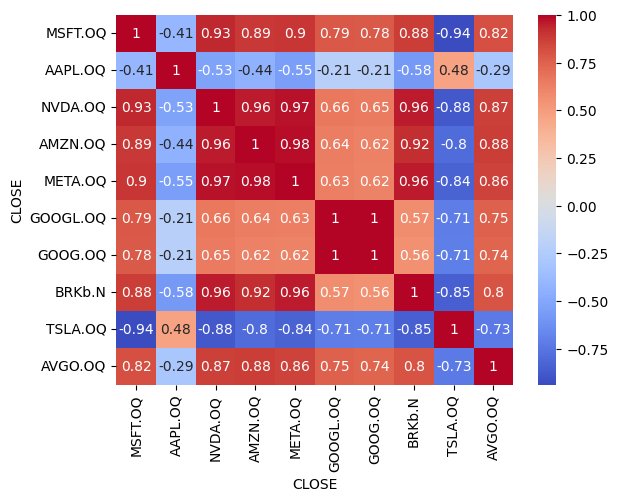

In [82]:
import seaborn as sns
sns.heatmap(df[ivv_corto].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

# Bibliografía

Python for Finance, 2nd Edition. December 2018 O'Reilly Media, Inc.
Numpy | ndarray Last Updated : 28 Jun, 2021 https://www.geeksforgeeks.org/numpy-ndarray/
Machine Learning for Trading, Tucker Balch, Arpan Chakraborty, Udacity. https://www.udacity.com/course/machine-learning-for-trading--ud501